# SBP Operators
#### References:

Carpenter, M. H., Parsani, M., Fisher, T. C., & Nielsen, E. J. (2015). Entropy Stable Staggered Grid Spectral Collocation for the Burgers' and Compressible Navier-Stokes Equations (No. NF1676L-22150).

Canuto, C., Hussaini, M. Y., Quarteroni, A., & Zang, T. A. (2007). Spectral methods: fundamentals in single domains. Springer Science & Business Media.


## Computing Lagrange basis

We import some useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from basis_nodes import generate_lagrange_poly, generate_LGL_points

The function generate_lagrange_poly(j, x_nodes) will return a Lagrange polynomial and its derivative:

$$
L_j(x)=\prod_{k \neq j} \frac{x-x_k}{x_j-x_k},
$$
and
$$
L_j^{\prime}(x)=\frac{\sum_{k=0, k \neq j}^n \prod_{l=0, l \neq k, l \neq j}^n\left(x-x_l\right)}{\prod_{k=0, k \neq j}^n\left(x_j-x_k\right)}.
$$

A set of nodes should be provided, it is desired that these be the Legendre-Gauss-Lobatto (LGL) nodes.

In [3]:
nodes = np.array([0,1,2,3,4,5,6])
idx = 4
poly, polyp = generate_lagrange_poly(idx,nodes)

/Users/munozmca/Desktop/Courses/Spring_2023/SBP_Operators_AMCS348/basis_nodes.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x_nodes == 'LGL':
/Users/munozmca/Desktop/Courses/Spring_2023/SBP_Operators_AMCS348/basis_nodes.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif x_nodes == 'LG':


In [4]:
vpoly = np.vectorize(poly)
vpolyp = np.vectorize(polyp)

/Users/munozmca/Desktop/Courses/Spring_2023/SBP_Operators_AMCS348/basis_nodes.py:23: RuntimeWarning: divide by zero encountered in divide
  return np.prod((x-x_nodes)/(xj-x_nodes), where = mask)
/Users/munozmca/Desktop/Courses/Spring_2023/SBP_Operators_AMCS348/basis_nodes.py:23: RuntimeWarning: invalid value encountered in divide
  return np.prod((x-x_nodes)/(xj-x_nodes), where = mask)


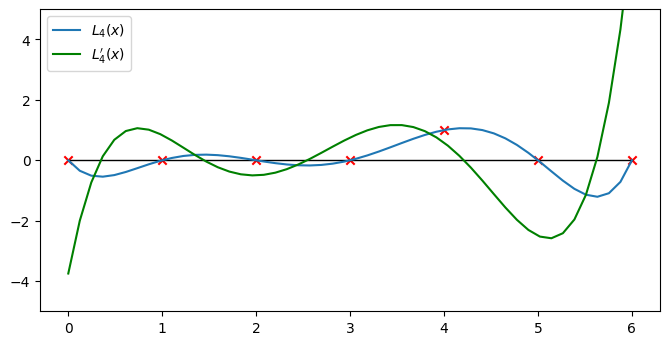

In [5]:
x = np.linspace(0,6,50)

fig = plt.figure(dpi=100, figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim([-5,5])
ax.plot(x,np.zeros(len(x)),color='k', lw=1)
ax.plot(x, vpoly(x), label=f'$L_{idx}(x)$')
ax.plot(x, vpolyp(x),color='g', label=f'$L_{idx}\'(x)$')
ax.scatter(nodes,vpoly(nodes),marker='x', color='r')
plt.legend()
plt.show()

## Computing LG and LGL points

In [6]:
degree_basis = 10 #degree_basis = n_points-1
(p_Legn, p_Legn_prime,
p_Legn1, p_Legn1_prime,
x_LG, w_LG,
x_LGL, w_LGL) = generate_LGL_points(degree_basis)
x = np.linspace(-1,1,1000)

The Legendre polynomials are computed as eigenfunctions of the Sturm-Liouville problem (Canuto et al., 2006):

$$
((1-x^2) L_k'(x))'+k(k+1) L_k(x) = 0.
$$

The Legendre-Gauss nodes and weights are computed as
$$
\begin{gathered}
x_j(j=0, \ldots, N) \text { zeros of } L_{N+1} ; \\
w_j=\frac{2}{\left(1-x_j^2\right)\left[L_{N+1}^{\prime}\left(x_j\right)\right]^2}, \quad j=0, \ldots, N
\end{gathered}
$$

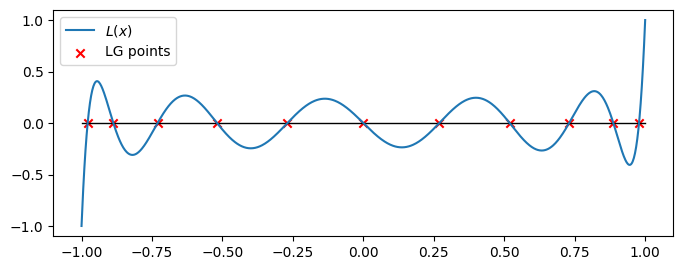

In [7]:
fig = plt.figure(dpi=100, figsize=(8,3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x,np.zeros(len(x)),color='k', lw=1)
ax.plot(x, p_Legn1(x), label=f'$L(x)$')
ax.scatter(x_LG,np.zeros(len(x_LG)),marker='x', color='r', label='LG points')
#ax.scatter(x_LG,w_LG,marker='x', color='g', label='LGL weights')
plt.legend()
plt.show()

The Legendre-Gauss-Lobatto nodes and weights are computed as

$$
\begin{gathered}
x_0=-1, x_N=1, x_j(j=1, \ldots, N-1) \text { zeros of } L_N^{\prime} ; \\
w_j=\frac{2}{N(N+1)} \frac{1}{\left[L_N\left(x_j\right)\right]^2}, \quad j=0, \ldots, N .
\end{gathered}
$$

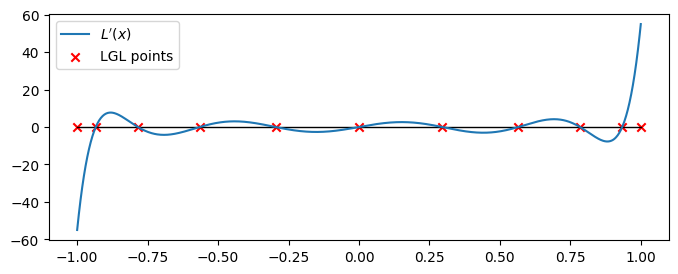

In [8]:
#tol=1.e-14
#findiff=(p_Legn(x+tol)-p_Legn(x-tol))/tol
fig = plt.figure(dpi=100, figsize=(8,3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x,np.zeros(len(x)),color='k', lw=1)
ax.plot(x, p_Legn_prime(x), label=f'$L\'(x)$')
#ax.plot(x,findiff, color='g')
ax.scatter(x_LGL,np.zeros(len(x_LGL)),marker='x', color='r', label='LGL points')
#ax.scatter(x_LGL,w_LGL,marker='x', color='g', label='LGL weights')
plt.legend()
plt.show()

Validating nodes and weights with some simple integrals

In [9]:
f = lambda x: x**2
g = lambda x: (1./3.)*x**3
num_int_LG=np.sum(f(x_LG)*w_LG)
num_int_LGL=np.sum(f(x_LGL)*w_LGL)
exact_int = g(1)-g(-1)
print(f"LG integration: {num_int_LG}")
print(f"LGL integration:{num_int_LGL}")
print(f"Exact integral: {exact_int}")


LG integration: 0.6666666666667884
LGL integration:0.6666666666666684
Exact integral: 0.6666666666666666


## Computing first order SBP matrices

### First Order Differential Operator
$$
\mathcal{D}=\left(d_{i j}\right)=\left(\frac{d L_j}{d x}\left(x_i\right)\right)
$$

In [21]:
from SBP_matrices import first_order_D, first_order_P_Q

degree_basis = 2 #degree_basis = n_nodes-1
(p_Legn, p_Legn_prime,
p_Legn1, p_Legn1_prime,
x_LG, w_LG,
x_LGL, w_LGL) = generate_LGL_points(degree_basis)

n_nodes = len(x_LGL)
x = np.linspace(-0.5,0.5,n_nodes)
D_LG = first_order_D(x_nodes=x_LG)
D_LGL = first_order_D(x_nodes=x_LGL)
D = first_order_D(x_nodes=x)
print("D_LG:")
print(np.round(D_LG,2))
print("D_LGL:")
print(np.round(D_LGL,2))
print("D:")
print(np.round(D,2))

D_LG:
[[-1.94 -0.65  2.58]
 [ 0.65  1.94 -2.58]
 [-0.65  0.65  0.  ]]
D_LGL:
[[-1.5  2.  -0.5]
 [-0.5 -0.   0.5]
 [ 0.5 -2.   1.5]]
D:
[[-3.  4. -1.]
 [-1. -0.  1.]
 [ 1. -4.  3.]]


### Computing P and Q

$$
\mathcal{P}=\sum_{\ell} \mathbf{L}\left(\eta_l ; \mathbf{x}\right) \mathbf{L}\left(\eta_l ; \mathbf{x}\right)^{\top} \omega_{\ell} \quad, \quad \mathcal{Q}=\sum_{\ell} \mathbf{L}\left(\eta_l ; \mathbf{x}\right) \frac{d \mathbf{L}}{d x}\left(\eta_l ; \mathbf{x}\right)^{\top} \omega_{\ell}
$$

In [22]:
P_LG, Q_LG = first_order_P_Q(x_Lagrange_nodes=x_LG)
P_LGL, Q_LGL = first_order_P_Q(x_Lagrange_nodes=x_LGL)
P, Q = first_order_P_Q(x_Lagrange_nodes=x)
print("P_LG:")
print(np.round(P_LG,2))
print("P_LGL:")
print(np.round(P_LGL,2))
print("P:")
print(np.round(P,2))

P_LG:
[[ 0.74  0.19 -0.37]
 [ 0.19  0.74 -0.37]
 [-0.37 -0.37  1.63]]
P_LGL:
[[0.33 0.   0.  ]
 [0.   1.33 0.  ]
 [0.   0.   0.33]]
P:
[[ 3.33 -4.    2.  ]
 [-4.    7.33 -4.  ]
 [ 2.   -4.    3.33]]


### Validating our computations using Q
We compute $Q$ through $Q=PQ$, and compare it with the matrices we obtained before


In [12]:
print("P_LG @ D_LG:")
print(np.round(P_LG@D_LG,2))
print("P_LGL @ D_LG:")
print(np.round(P_LGL@D_LGL,2))
print("P @ D:")
print(np.round(P@D,2))

P_LG @ D_LG:
[[-1.08 -0.36  1.43]
 [ 0.36  1.08 -1.43]
 [-0.57  0.57 -0.  ]]
P_LGL @ D_LG:
[[-0.5   0.67 -0.17]
 [-0.67  0.    0.67]
 [ 0.17 -0.67  0.5 ]]
P @ D:
[[-4.    5.33 -1.33]
 [ 0.67  0.   -0.67]
 [ 1.33 -5.33  4.  ]]


In [13]:
print("Q_LG:")
print(np.round(Q_LG,2))
print("Q_LGL:")
print(np.round(Q_LGL,2))
print("Q:")
print(np.round(Q,2))

Q_LG:
[[-1.08 -0.36  1.43]
 [ 0.36  1.08 -1.43]
 [-0.57  0.57 -0.  ]]
Q_LGL:
[[-0.5   0.67 -0.17]
 [-0.67  0.    0.67]
 [ 0.17 -0.67  0.5 ]]
Q:
[[-4.    5.33 -1.33]
 [ 0.67  0.   -0.67]
 [ 1.33 -5.33  4.  ]]


### Verifying SBP properties
From inspection we can see that $P$ is symmetric for the different Lagrange bases, lets check if it's PD:

In [14]:
def is_pos_def(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
print(f"P_LG SPD?: {is_pos_def(P_LG)}")
print(f"P_LGL SPD?: {is_pos_def(P_LGL)}")
print(f"P SPD?: {is_pos_def(P)}")

P_LG SPD?: True
P_LGL SPD?: True
P SPD?: True


Now we check if
$$
    Q^T = B- Q. \qquad B=\text{Diag}(-1,0,...,0,1)
$$

In [15]:
B=np.zeros((len(P),len(P))); B[0,0]=-1; B[-1,-1]=1
print(f"Q_LG^T - (B-Q_LG):\n", np.round(np.transpose(Q_LG)-(B-Q_LG),2))
print(f"Q_LGL^T - (B-Q_LGL):\n", np.round(np.transpose(Q_LGL)-(B-Q_LGL),2))
print(f"Q^T - (B-Q):\n", np.round(np.transpose(Q)-(B-Q),2))

Q_LG^T - (B-Q_LG):
 [[-1.15 -0.    0.86]
 [-0.    2.15 -0.86]
 [ 0.86 -0.86 -1.  ]]
Q_LGL^T - (B-Q_LGL):
 [[ 0.  0.  0.]
 [ 0.  0. -0.]
 [ 0. -0.  0.]]
Q^T - (B-Q):
 [[-7.  6.  0.]
 [ 6.  0. -6.]
 [ 0. -6.  7.]]


Apart from having a diagonal matrix $P_{LGL}$, the Lagrange basis produced by the LGL nodes gives us matrices $P_{LGL}$ and $Q_{LGL}$ that satisfy the SBP convention.

## LGL nodes and weights, and SBP operators mapped to a new interval

It is often desired to work in a different interval than $[-1,1]$, say $[x_\min, x_\max]$. 
We can map the LGL nodes using the affine mapping:

$$
x = a \xi + b,\quad \xi\in[-1,1],\; x\in [x_\min,x_\max],
$$

where
$$
a = \frac{x_\max-x_\min}{2}, \quad b=\frac{x_\min+x_\max}{2}.
$$

Furthermore, we can approximate integrals as

$$
\int_{x_\min}^{x_\max} g(x)dx = a\int_{-1}^1 g(a\xi+b)d\xi \approx a\sum_{i=1}^N w_i g(a\xi_i+b) =\sum_{i=1}^N a w_i g(x_i).
$$

Therefore, to obtain weights for the new mapped abcissae, it suffices to multiply the LGL weights by $a$.

In [16]:
degree_basis = 4 #degree_basis = n_nodes-1
(p_Legn, p_Legn_prime,
p_Legn1, p_Legn1_prime,
xi_LG, w_LG,
xi_LGL, w_LGL) = generate_LGL_points(degree_basis)

xmin = -3; xmax=3
a = (xmax-xmin)/2.; b = (xmax+xmin)/2.
x_mapped = a*xi_LGL+b
w_mapped = a*w_LGL

In [17]:
print(np.sum(w_LGL))
print(np.sum(w_mapped))

2.0000000000000004
6.000000000000001


Since the Lagrange basis and, therefore, the first order differential operator just require a set of nodes for computation, they are computed exactly as before.
However, special care should be taken for the computation of $P$ and $Q$.
### Lagrange basis

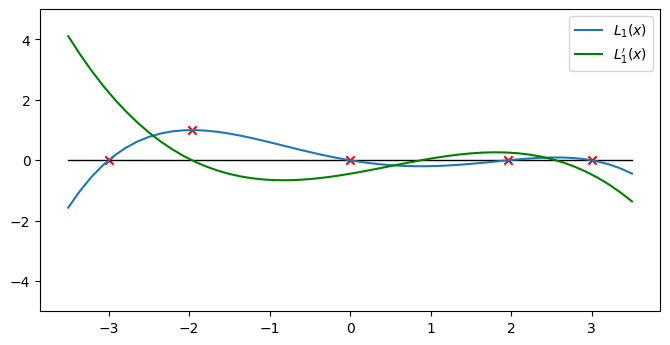

In [18]:
poly, polyp = generate_lagrange_poly(1,x_mapped)
x = np.linspace(-3.5,3.5,50)
vpoly = np.vectorize(poly)
vpolyp = np.vectorize(polyp)
fig = plt.figure(dpi=100, figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim([-5,5])
ax.plot(x,np.zeros(len(x)),color='k', lw=1)
ax.plot(x, vpoly(x), label=f'$L_{1}(x)$')
ax.plot(x, vpolyp(x),color='g', label=f'$L_{1}\'(x)$')
ax.scatter(x_mapped,vpoly(x_mapped),marker='x', color='r')
plt.legend()
plt.show()

### First Order Differential Operator D

In [23]:
D_mapped = first_order_D(x_nodes=x_mapped)
print(np.round(D_mapped,2))

[[-1.67  2.25  0.47 -0.89 -0.17]
 [-0.41  0.   -0.25  0.58  0.09]
 [-0.09  0.25 -0.   -0.58  0.41]
 [ 0.13 -0.45  0.45 -0.   -0.13]
 [ 0.17 -0.47 -2.25  0.89  1.67]]


### Computing P and Q

The computation of P and Q require the evaluation of the Lagrange basis (obtained with the collocation points $\mathbf{x}$) in the LGL nodes $\eta$. Therefore, the mapped abcissae and weights should be used to generate and evaluate the Lagrange polynomials:
$$
\mathcal{P}= a\sum_{\ell} \mathbf{L}\left(x(\eta_l) ; \mathbf{x}\right) \mathbf{L}\left(x(\eta_l) ; \mathbf{x}\right)^{\top} \omega_{\ell} \quad, \quad 
\mathcal{Q}=a\sum_{\ell} \mathbf{L}\left(x(\eta_l) ; \mathbf{x}\right) \frac{d \mathbf{L}}{d x}\left(x(\eta_l) ; \mathbf{x}\right)^{\top} \omega_{\ell}
$$

### 